In [278]:
%matplotlib inline
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [279]:
url = 'http://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=1;template=results;type=batting'

In [280]:
def scrape_data(page_count):
    """
    scrapes the required data present in the form of a table from the given url
    :param url: page of the ESPNCricinfo Stats URL query
    :return: the raw unicode text
    """
    complete_url = url.partition('page=1')[0] + "page=" + str(page_count) + url.partition('page=1')[-1]
    r = requests.get(complete_url)
    data = r.text
    soup = BeautifulSoup(data)
    table = soup.find_all('table')
    return table[2].text

In [281]:
def clean_data(text):
    """
    cleans the data removing all whitespaces and other data
    :param text: table text of each page
    :return: cleaned text  
    """
    text = text.split('\n')
    text.remove(u'Overall figures')
    return text

In [283]:
def create_data():
    """
    
    """
    
    page_count = 56

    df = pd.DataFrame()

    get_list_columns = lambda text, start_index, end_index: [str(unicode_text)
                                                                for unicode_text in text][start_index:end_index]

    get_data_rows = lambda text, start_index: text[start_index:]

    remove_all_occurences = lambda data, item: [x for x in data if x != item]

    get_list_rows = lambda data: [data[index: index + 11] for index, row in enumerate(data) if index % 11 == 0]

    for page in range(1, page_count + 1):
        raw_text = scrape_data(page)
        clean_text = clean_data(raw_text)
        list_columns = get_list_columns(clean_text, 3, 14)
        data_rows = get_data_rows(clean_text, 14)
        data_rows = remove_all_occurences(data_rows, u'')
        list_rows = get_list_rows(data_rows)
        df_new = pd.DataFrame(list_rows, columns=list_columns)
        if len(df) == 0:
            df = df_new
        else:
            df = pd.concat([df, df_new])
    return df

In [284]:
df_full = create_data()
df_full = df_full.reset_index(drop=True)

In [299]:
df_full

,player,span,mat,inns,not_outs,runs,high_score,ave,n_100,n_50,n_0
0,SR Tendulkar (India),1989-2013,200,329,33,15921,248*,53.78,51,68,14
1,RT Ponting (Aus),1995-2012,168,287,29,13378,257,51.85,41,62,17
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16
3,R Dravid (ICC/India),1996-2012,164,286,32,13288,270,52.31,36,63,8
4,KC Sangakkara (SL),2000-2015,134,233,17,12400,319,57.40,38,52,11
5,BC Lara (ICC/WI),1990-2006,131,232,6,11953,400*,52.88,34,48,17
6,S Chanderpaul (WI),1994-2015,164,280,49,11867,203*,51.37,30,66,15
7,DPMD Jayawardene (SL),1997-2014,149,252,15,11814,374,49.84,34,50,15
8,AR Border (Aus),1978-1994,156,265,44,11174,205,50.56,27,63,11
9,SR Waugh (Aus),1985-2004,168,260,46,10927,200,51.06,32,50,22


In [330]:
df_full.columns = ['player', 'span', 'mat', 'inns', 'not_outs', 'runs', 'high_score', 'ave', 'n_100', 'n_50', 'n_0']

In [332]:
df_span = df_full[['player','span','runs']]
calc_career_length = lambda span: [ int(each_span.partition('-')[-1]) - int(each_span.partition('-')[0]) for each_span in span]
df_span['career_length'] = calc_career_length(df_span.span)

/Users/kramaswamy/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


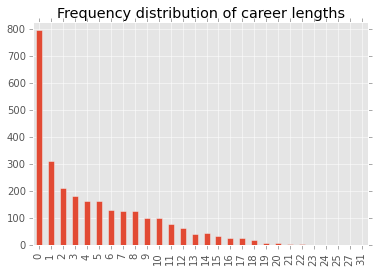

In [309]:
df_span_freq = df_span['career_length'].value_counts().sort_index()
df_span_freq.plot(kind='bar', title='Frequency distribution of career lengths', ylim = (0, 825))

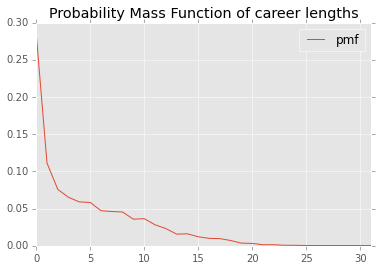

In [343]:
df_span_pmf = df_span_freq/ len(df_span)
df_span_pmf.plot(label ='pmf', legend = True, title = 'Probability Mass Function of career lengths')

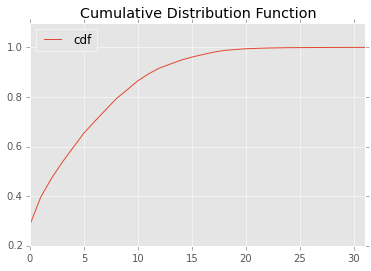

In [347]:
df_span_cdf = df_span_freq.cumsum() / sum(df_span_freq)
df_span_cdf.plot(label='cdf', legend=True, title= 'Cumulative Distribution Function', ylim = (0.2, 1.1))

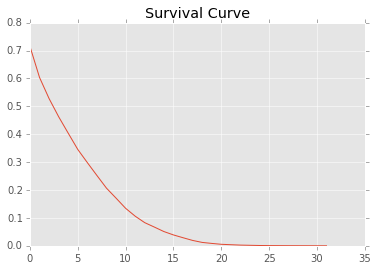

In [348]:
df_survival = 1 - df_span_cdf
df_survival.plot(title='Survival Curve', xlim=[0,35])

In [349]:
calc_cohort = lambda span: [0 if int(each_span.partition('-')[-1]) <= 1970 
                            else 1 if int(each_span.partition('-')[-1]) in range(1971,1981)
                            else 2 if int(each_span.partition('-')[-1]) in range(1981,1991)
                            else 3 if int(each_span.partition('-')[-1]) in range(1991,2000)
                            else 4 if int(each_span.partition('-')[-1]) in range(2011,2011)
                            else 5 
                            for each_span in span]

In [350]:
df_span['cohort'] = calc_cohort(df_span.span)

/Users/kramaswamy/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [351]:
df_span.cohort.value_counts().sort_index()

0    1254
1     203
2     257
3     275
5     808
dtype: int64

In [352]:
df_span = df_span.sort_index(by=['career_length'], ascending=[False])
df_span.reset_index(drop=True)

,player,span,runs,career_length,cohort
0,W Rhodes (Eng),1899-1930,2325,31,0
1,DB Close (Eng),1949-1976,887,27,1
2,FE Woolley (Eng),1909-1934,3283,25,0
3,SR Tendulkar (India),1989-2013,15921,24,5
4,GA Headley (WI),1930-1954,2190,24,0
5,G Gunn (Eng),1907-1930,1120,23,0
6,AJ Traicos (SA/Zim),1970-1993,19,23,3
7,FR Brown (Eng),1931-1953,734,22,0
8,SE Gregory (Aus),1890-1912,2282,22,0
9,AW Nourse (SA),1902-1924,2234,22,0


In [353]:
revalue_runs = lambda runs: [0 if str(each_runs) == '-' else each_runs for each_runs in runs]
df_span.runs = revalue_runs(df_span.runs)

In [354]:
df_span.reset_index(drop=True)

,player,span,runs,career_length,cohort
0,W Rhodes (Eng),1899-1930,2325,31,0
1,DB Close (Eng),1949-1976,887,27,1
2,FE Woolley (Eng),1909-1934,3283,25,0
3,SR Tendulkar (India),1989-2013,15921,24,5
4,GA Headley (WI),1930-1954,2190,24,0
5,G Gunn (Eng),1907-1930,1120,23,0
6,AJ Traicos (SA/Zim),1970-1993,19,23,3
7,FR Brown (Eng),1931-1953,734,22,0
8,SE Gregory (Aus),1890-1912,2282,22,0
9,AW Nourse (SA),1902-1924,2234,22,0


In [355]:
df_1970 = df_span.query('cohort == 0')

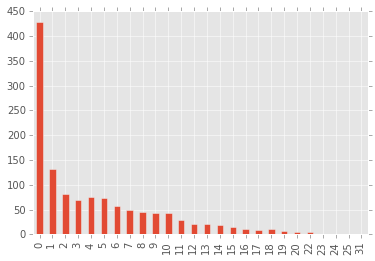

In [356]:
df_1970_freq = df_1970.career_length.value_counts().sort_index()
df_1970_freq.plot(kind='bar')

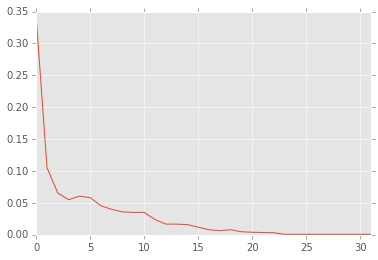

In [357]:
df_1970_pmf = df_1970_freq / len(df_1970)
df_1970_pmf.plot()

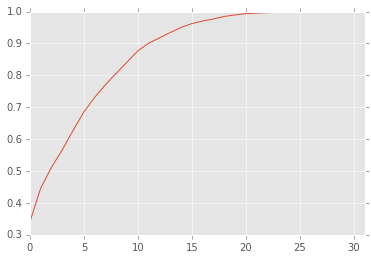

In [358]:
df_1970_cdf = df_1970_freq.cumsum() / sum(df_1970_freq)
df_1970_cdf.plot()

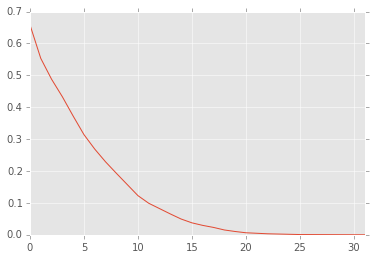

In [359]:
df_1970_survival = 1 - df_1970_cdf
df_1970_survival.plot()

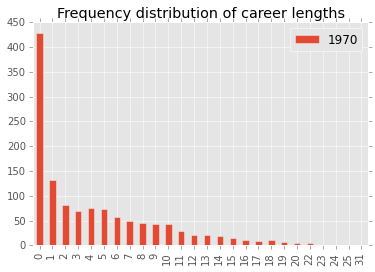

In [364]:
def create_freq_dist(df, label):
    df_freq = df.value_counts().sort_index()
    df_freq.plot(kind='bar', title = 'Frequency distribution of career lengths', legend = True, label = label)
create_freq_dist(df_1970.career_length, '1970')

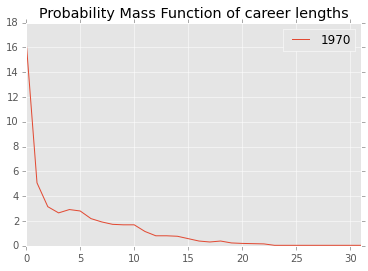

In [365]:
def create_pmf(df, label):
    df_freq = df.value_counts().sort_index()
    df_pmf =  df_freq / len(df_freq)
    df_pmf.plot(title='Probability Mass Function of career lengths', legend=True, label=label)
create_pmf(df_1970.career_length,'1970')